In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
i = 1:55

In [4]:
n = 55

# Hypothesis 1

In [5]:
entity_edits_and_misalignment_hypothesis_1 <- read.table("../../../results/entity_categorization/hypothesis_1.tsv", header=TRUE, sep="\t")

In [6]:
entity_edits_and_misalignment_hypothesis_1 <- data.table(entity_edits_and_misalignment_hypothesis_1)

In [7]:
summary(entity_edits_and_misalignment_hypothesis_1)

   file_date      misaligned_bot_edits misaligned_semi_automated_edits
 Min.   :201211   Min.   :       14    Min.   :      0                
 1st Qu.:201379   1st Qu.: 20182186    1st Qu.:  48618                
 Median :201502   Median : 64803256    Median :  86236                
 Mean   :201474   Mean   : 56596780    Mean   :1707310                
 3rd Qu.:201604   3rd Qu.: 87711870    3rd Qu.:1410480                
 Max.   :201706   Max.   :108827703    Max.   :9818368                
 misaligned_non_bot_edits misaligned_anon_edits aligned_bot_edits 
 Min.   :   29761         Min.   :    80        Min.   :     659  
 1st Qu.: 2852764         1st Qu.: 78362        1st Qu.:46599929  
 Median : 8294521         Median :115674        Median :49892103  
 Mean   : 8160646         Mean   : 97202        Mean   :44972212  
 3rd Qu.:13453100         3rd Qu.:124596        3rd Qu.:54805652  
 Max.   :17299276         Max.   :146177        Max.   :61373079  
 aligned_semi_automated_edits alig

In [8]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_1 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_1, file_date)[1:55,]

In [9]:
head(sorted_entity_edits_and_misalignment_hypothesis_1)

file_date,misaligned_bot_edits,misaligned_semi_automated_edits,misaligned_non_bot_edits,misaligned_anon_edits,aligned_bot_edits,aligned_semi_automated_edits,aligned_non_bot_edits,aligned_anon_edits
201211,14,0,29761,80,659,0,192611,358
201212,3858,17008,177019,964,165578,10849,204287,1894
201301,165717,30952,215493,1395,1859019,19610,318293,3374
201302,435901,36192,297242,2137,3743399,21588,405059,4520
201303,698671,39736,423950,3407,5636283,22996,546782,7851
201304,2005176,39645,610425,8503,11749258,20469,733087,16009


In [10]:
hypothesis_1_misaligned_automated_edits = data.table(i = i, n = n)

In [11]:
hypothesis_1_aligned_automated_edits = data.table(i = i, n = n)

In [12]:
attach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [13]:
hypothesis_1_misaligned_automated_edits$p <- ((misaligned_bot_edits + misaligned_semi_automated_edits)/(misaligned_bot_edits + misaligned_semi_automated_edits + misaligned_non_bot_edits + misaligned_anon_edits))

In [14]:
hypothesis_1_aligned_automated_edits$p <- ((aligned_bot_edits + aligned_semi_automated_edits)/(aligned_bot_edits + aligned_semi_automated_edits + aligned_non_bot_edits + aligned_anon_edits))

In [15]:
detach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [16]:
hypothesis_1_misaligned_automated_edits$se = sqrt((hypothesis_1_misaligned_automated_edits$p*(1-hypothesis_1_misaligned_automated_edits$p))/n)

In [17]:
hypothesis_1_aligned_automated_edits$se = sqrt((hypothesis_1_aligned_automated_edits$p*(1-hypothesis_1_aligned_automated_edits$p))/n)

In [18]:
hypothesis_1_misaligned_automated_edits$group = "misaligned_automated"
hypothesis_1_aligned_automated_edits$group = "aligned_automated"

In [19]:
grouped_hypothesis_1.dt = rbind(hypothesis_1_misaligned_automated_edits, hypothesis_1_aligned_automated_edits)

In [20]:
grouped_hypothesis_1.dt$group = factor(grouped_hypothesis_1.dt$group)

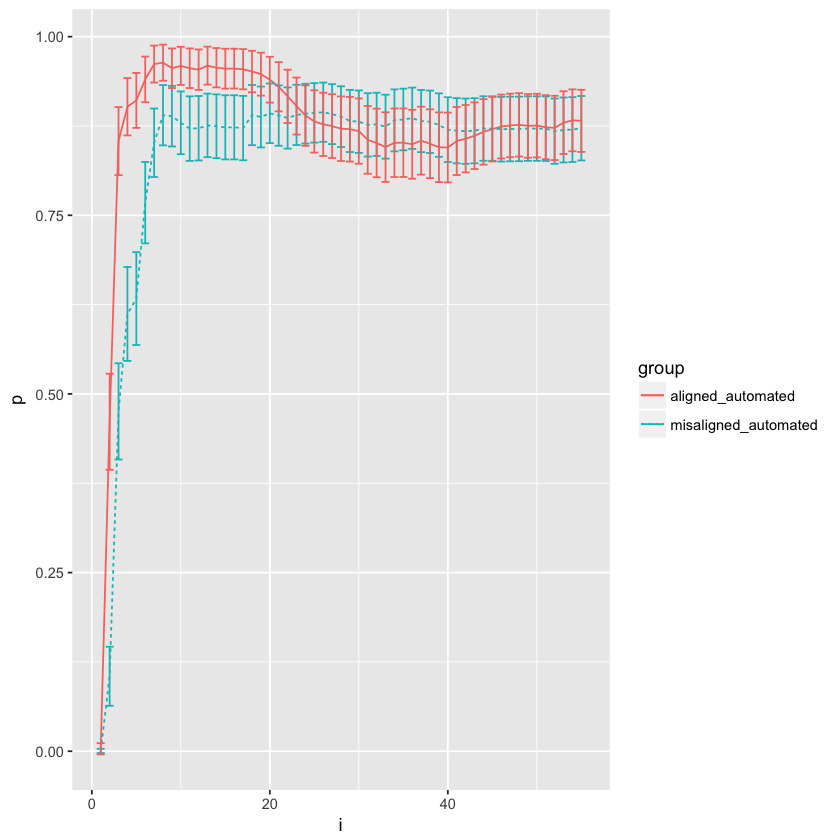

In [21]:
ggplot(grouped_hypothesis_1.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 1a

In [22]:
hypothesis_1a_misaligned_bot_edits = data.table(i = i, n = n)

In [23]:
hypothesis_1a_aligned_bot_edits = data.table(i = i, n = n)

In [24]:
attach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [25]:
hypothesis_1a_misaligned_bot_edits$p <- ((misaligned_bot_edits)/(misaligned_bot_edits + misaligned_semi_automated_edits + misaligned_non_bot_edits + misaligned_anon_edits))

In [26]:
hypothesis_1a_aligned_bot_edits$p <- ((aligned_bot_edits)/(aligned_bot_edits + aligned_semi_automated_edits + aligned_non_bot_edits + aligned_anon_edits))

In [27]:
detach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [28]:
hypothesis_1a_misaligned_bot_edits$se = sqrt((hypothesis_1a_misaligned_bot_edits$p*(1-hypothesis_1a_misaligned_bot_edits$p))/n)

In [29]:
hypothesis_1a_aligned_bot_edits$se = sqrt((hypothesis_1a_aligned_bot_edits$p*(1-hypothesis_1a_aligned_bot_edits$p))/n)

In [30]:
hypothesis_1a_misaligned_bot_edits$group = "misaligned_bot"
hypothesis_1a_aligned_bot_edits$group = "aligned_bot"

In [31]:
grouped_hypothesis_1a.dt = rbind(hypothesis_1a_misaligned_bot_edits, hypothesis_1a_aligned_bot_edits)

In [32]:
grouped_hypothesis_1a.dt$group = factor(grouped_hypothesis_1a.dt$group)

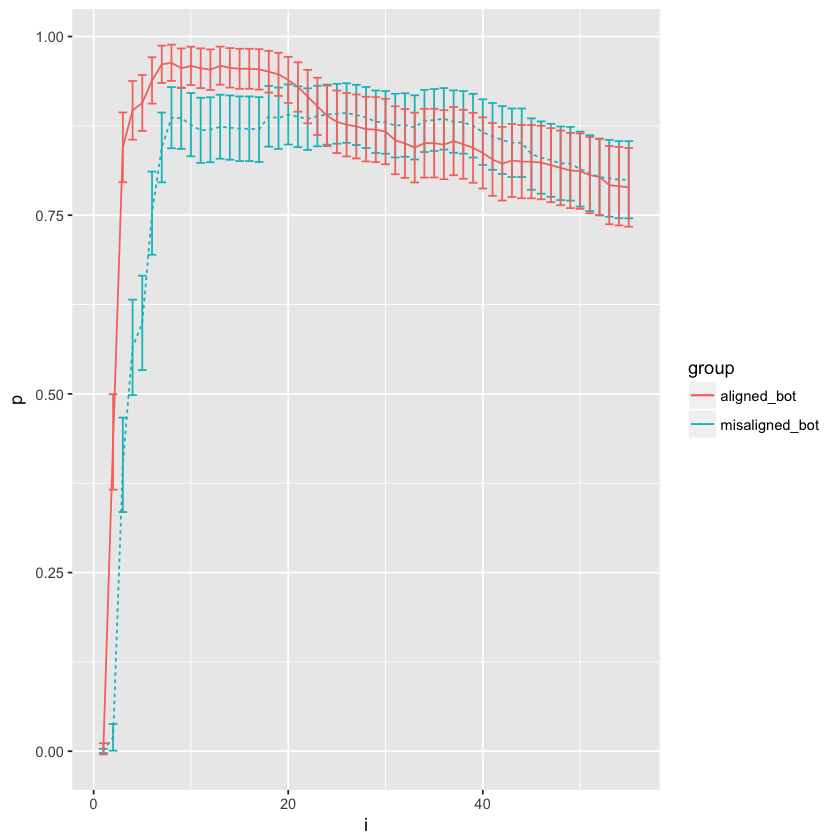

In [33]:
ggplot(grouped_hypothesis_1a.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 1b

In [34]:
hypothesis_1b_misaligned_semi_automated_edits = data.table(i = i, n = n)

In [35]:
hypothesis_1b_aligned_semi_automated_edits = data.table(i = i, n = n)

In [36]:
attach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [37]:
hypothesis_1b_misaligned_semi_automated_edits$p <- ((misaligned_semi_automated_edits)/(misaligned_bot_edits + misaligned_semi_automated_edits + misaligned_non_bot_edits + misaligned_anon_edits))

In [38]:
hypothesis_1b_aligned_semi_automated_edits$p <- ((aligned_semi_automated_edits)/(aligned_bot_edits + aligned_semi_automated_edits + aligned_non_bot_edits + aligned_anon_edits))

In [39]:
detach(sorted_entity_edits_and_misalignment_hypothesis_1)

In [40]:
hypothesis_1b_misaligned_semi_automated_edits$se = sqrt((hypothesis_1b_misaligned_semi_automated_edits$p*(1-hypothesis_1b_misaligned_semi_automated_edits$p))/n)

In [41]:
hypothesis_1b_aligned_semi_automated_edits$se = sqrt((hypothesis_1b_aligned_semi_automated_edits$p*(1-hypothesis_1b_aligned_semi_automated_edits$p))/n)

In [42]:
hypothesis_1b_misaligned_semi_automated_edits$group = "misaligned_semi_automated"
hypothesis_1b_aligned_semi_automated_edits$group = "aligned_semi_automated"

In [43]:
grouped_hypothesis_1b.dt = rbind(hypothesis_1b_misaligned_semi_automated_edits, hypothesis_1b_aligned_semi_automated_edits)

In [44]:
grouped_hypothesis_1b.dt$group = factor(grouped_hypothesis_1b.dt$group)

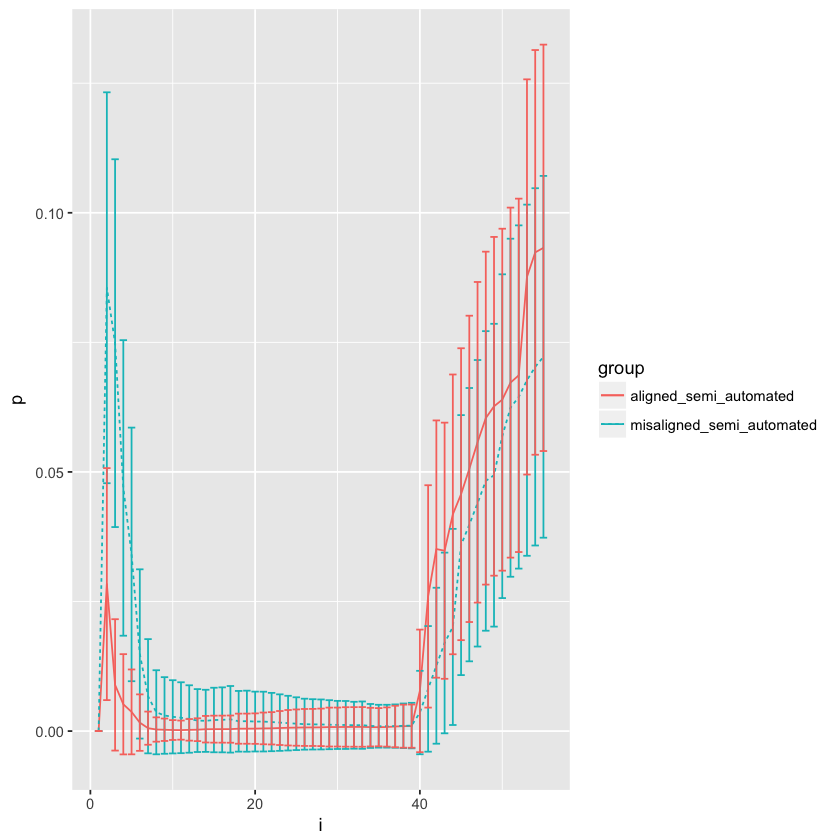

In [45]:
ggplot(grouped_hypothesis_1b.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)